In [87]:
#importing required libraries and loading data
import pandas as pd
import matplotlib.pyplot as plt
mlr=pd.read_csv('/content/ToyotaCorolla - MLR.csv')
mlr


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [88]:
#exploratory analysis
mlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [89]:
mlr.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


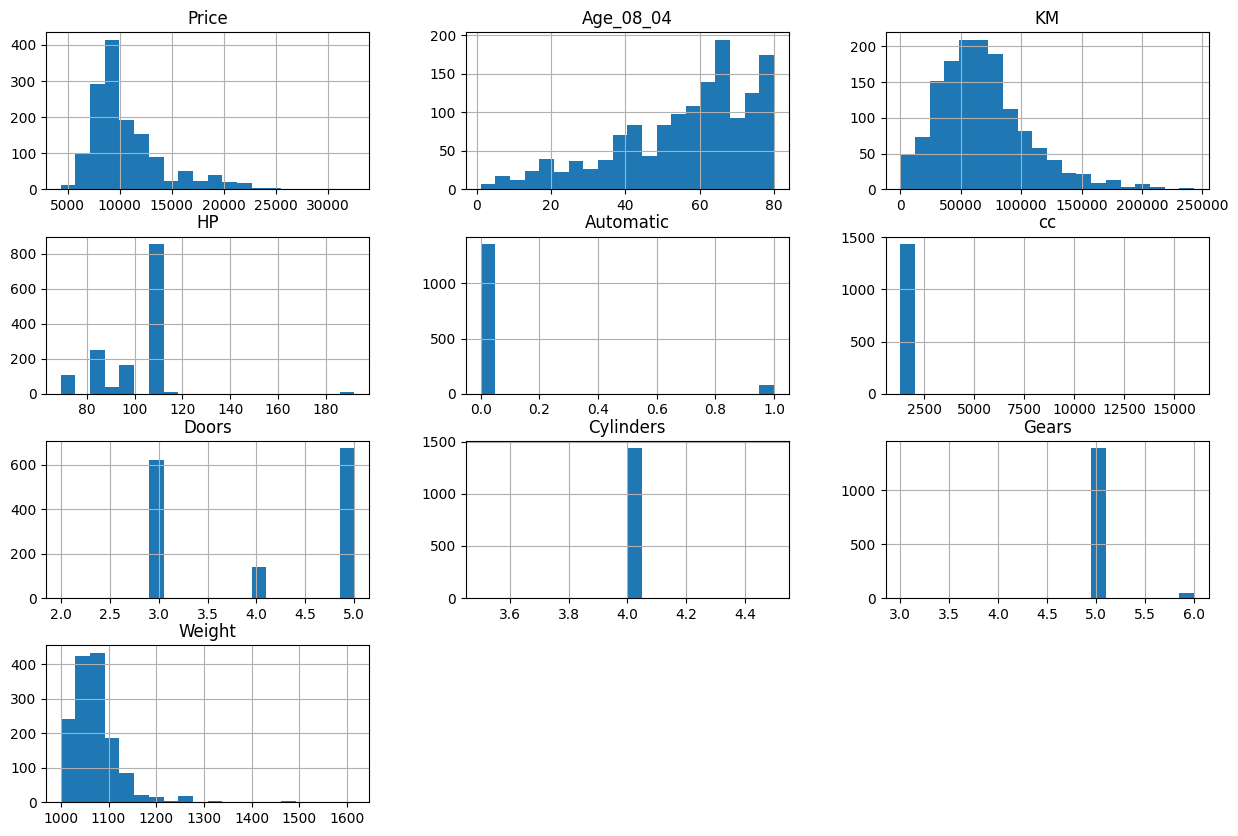

In [90]:
#plotting a histogram to visualize the data
mlr.hist(bins=20,figsize=(15,10))
plt.show()

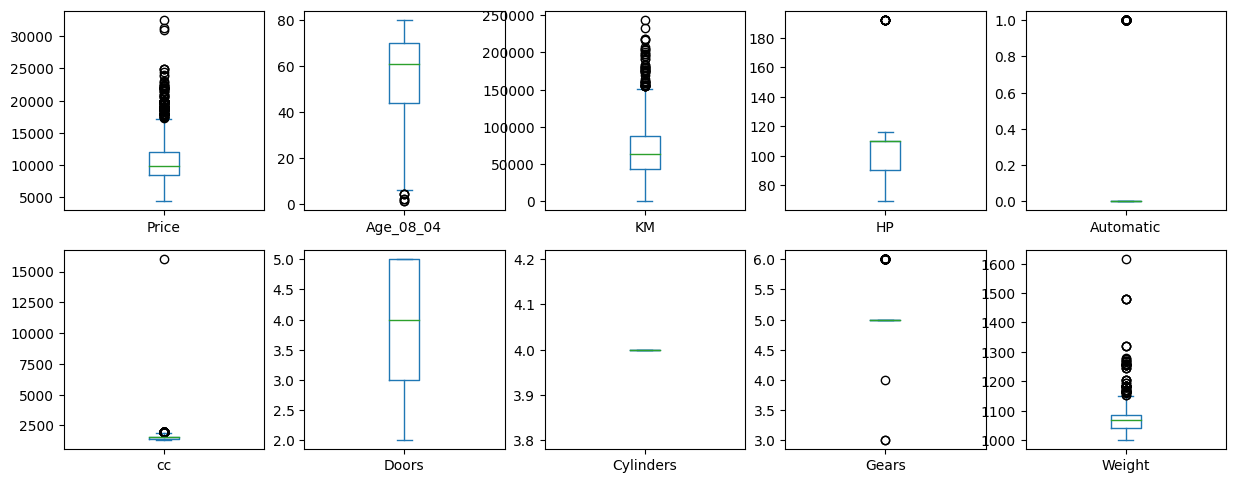

In [91]:
#plotting a boxplot to find outliers
mlr.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15))
plt.show()


In [92]:
#filling any null data with mean of the column
mlr.fillna(mlr.mean,inplace=True)

In [93]:
print(mlr.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [94]:
#performing one hot coding to change object to numerical so it can be used in regression  model
mlr= pd.get_dummies(mlr,columns=['Fuel_Type'],drop_first=True)
mlr = mlr.astype(int)
mlr

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [95]:
#standardising the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
mlr[numerical_columns] = scaler.fit_transform(mlr[numerical_columns])
mlr

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,0,1
1432,0.031491,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0,1
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0,1
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0,1


In [96]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = mlr.drop('Price', axis=1)
y = mlr['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
from sklearn.linear_model import LinearRegression

# Model 1: Basic Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Model 2: Linear Regression with interaction terms
# For simplicity, we use PolynomialFeatures to add interaction terms
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

# Model 3: Linear Regression with selected features
selected_features = ['cc', 'KM', 'HP', 'Weight']
model3 = LinearRegression()
model3.fit(X_train[selected_features], y_train)

LinearRegression()

In [98]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Model 1
y_pred1 = model1.predict(X_test)
print("Model 1 - R²:", r2_score(y_test, y_pred1))
print("Model 1 - MSE:", mean_squared_error(y_test, y_pred1))

# Evaluate Model 2
y_pred2 = model2.predict(X_test_poly)
print("Model 2 - R²:", r2_score(y_test, y_pred2))
print("Model 2 - MSE:", mean_squared_error(y_test, y_pred2))

# Evaluate Model 3
y_pred3 = model3.predict(X_test[selected_features])
print("Model 3 - R²:", r2_score(y_test, y_pred3))
print("Model 3 - MSE:", mean_squared_error(y_test, y_pred3))


Model 1 - R²: 0.834888804061108
Model 1 - MSE: 0.16758650548094217
Model 2 - R²: 0.7800192112725223
Model 2 - MSE: 0.2232786907401698
Model 3 - R²: 0.6074568770463291
Model 3 - MSE: 0.39842804028097933


In [99]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso - R²:", r2_score(y_test, y_pred_lasso))
print("Lasso - MSE:", mean_squared_error(y_test, y_pred_lasso))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge - R²:", r2_score(y_test, y_pred_ridge))
print("Ridge - MSE:", mean_squared_error(y_test, y_pred_ridge))


Lasso - R²: -0.0010352178542201163
Lasso - MSE: 1.0160425104402415
Ridge - R²: 0.8353255258388035
Ridge - MSE: 0.16714323646956342
